In [33]:
import pandas as pd
import numpy as np
import plotly.express as px
import joblib
import matplotlib.pyplot as plt

In [35]:
insta_post = insta_posts[[ 'caption', 'id', 'locationId', 'locationName', 'ownerFullName', 'ownerId', 'ownerUsername', 'timestamp']] 
hashtags = insta_posts[[f'hashtags/{i}' for i in range(30)]]
insta_posts = pd.concat([insta_post, hashtags], axis=1)

In [36]:
insta_posts

,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"30 Dead, Over 500 Stranded As Himachal Pradesh...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ਹੜ ਕਾਰਨ ਬੇਘਰ ਹੋਏ ਲੋਕਾਂ ਲਈ ਸਰਕਾਰ ਵੱਲੋਂ ਰਾਖਵੀਂ ਕ...,3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,భారీ వర్షాలు ఉత్తరాదిని వణికిస్తున్నాయి. ఢిల్ల...,3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,updates,NaN,NaN,NaN
3,The Yamuna in Delhi has exceeded the evacuatio...,3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,floods,weather,river,hurricane,kerala,life,india,moldremoval
4,DO FOLLOW @software_santha for more updates\n....,3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,#road #flood #rain #Gurgaon #City #Citylife #G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Are you scared of thunder?⚡️\nIn frame @jha_re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,पटना में बीते कुछ दिनों से बारिश नही हुई जिसकी...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Rainy day in Kyoto🌂\nNinenzaka #二年坂 🌧\n\n#phot...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
%pip install googletrans==3.1.0a0

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: googletrans==3.1.0a0 in c:\users\pakhi\appdata\local\programs\python\python39\lib\site-packages (3.1.0a0)




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from googletrans import Translator

translator = Translator()

insta_posts['caption'] = insta_posts.caption.apply(lambda x: translator.translate(x).text)
insta_posts

,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"30 Dead, Over 500 Stranded As Himachal Pradesh...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Places reserved by the government for people d...,3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Heavy rains lash the north. Heavy rains are fa...,3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,updates,NaN,NaN,NaN
3,The Yamuna in Delhi has exceeded the evacuatio...,3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,floods,weather,river,hurricane,kerala,life,india,moldremoval
4,DO FOLLOW @software_santha for more updates\n....,3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,floods,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,#road #flood #rain #Gurgaon #City #Citylife #G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Are you scared of thunder?⚡️\nIn frame @jha_re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,There has been no rain in Patna for the last f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,Rainy day in Kyoto🌂\nNinenzaka #Ninenzaka 🌧\n\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
insta_posts['hashtags/0'].value_counts()

hashtags/0
floods             12
flood               6
India               4
patiala             3
himachalpradesh     3
                   ..
hatkee              1
Punjab              1
Be                  1
drug                1
ഇരുട്ട്             1
Name: count, Length: 73, dtype: int64

In [40]:
hashtags.value_counts()

hashtags/0                    hashtags/1        hashtags/2    hashtags/3                                                                                                                                                                                                                                                                                                               hashtags/4              hashtags/5           hashtags/6    hashtags/7       hashtags/8                                                                                                                                                                                                                                                                                                               hashtags/9           hashtags/10         hashtags/11           hashtags/12        hashtags/13                                                                                                                                               

In [41]:
%pip install nltk


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [43]:
lemmatizer = WordNetLemmatizer()
for i in range(30):
    insta_posts[f'hashtags/{i}'] = insta_posts[f'hashtags/{i}'].apply(lambda x: '-' if isinstance(x, float) else x)
for i in range(30):
    insta_posts[f'hashtags/{i}'] = insta_posts[f'hashtags/{i}'].apply(lambda x: lemmatizer.lemmatize(x))
insta_posts

,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"30 Dead, Over 500 Stranded As Himachal Pradesh...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,flood,...,-,-,-,-,-,-,-,-,-,-
1,Places reserved by the government for people d...,3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,flood,...,-,-,-,-,-,-,-,-,-,-
2,Heavy rains lash the north. Heavy rains are fa...,3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,update,-,-,-
3,The Yamuna in Delhi has exceeded the evacuatio...,3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,flood,weather,river,hurricane,kerala,life,india,moldremoval
4,DO FOLLOW @software_santha for more updates\n....,3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,flood,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,#road #flood #rain #Gurgaon #City #Citylife #G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
196,Are you scared of thunder?⚡️\nIn frame @jha_re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
197,There has been no rain in Patna for the last f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
198,Rainy day in Kyoto🌂\nNinenzaka #Ninenzaka 🌧\n\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-


In [44]:
insta_posts.loc[:, 'hashtags/0':].value_counts()

hashtags/0        hashtags/1    hashtags/2      hashtags/3                                                                                                                                                                                                                                                                                                              hashtags/4    hashtags/5        hashtags/6    hashtags/7       hashtags/8                                                                                                                                                                                                                                                                                                              hashtags/9         hashtags/10          hashtags/11  hashtags/12  hashtags/13                                                                                                                                                                                            

In [45]:
insta_posts['caption'] = insta_posts.caption.apply(lambda x: lemmatizer.lemmatize(x))

In [46]:
insta_posts

,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"30 Dead, Over 500 Stranded As Himachal Pradesh...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,flood,...,-,-,-,-,-,-,-,-,-,-
1,Places reserved by the government for people d...,3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,flood,...,-,-,-,-,-,-,-,-,-,-
2,Heavy rains lash the north. Heavy rains are fa...,3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,update,-,-,-
3,The Yamuna in Delhi has exceeded the evacuatio...,3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,flood,weather,river,hurricane,kerala,life,india,moldremoval
4,DO FOLLOW @software_santha for more updates\n....,3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,flood,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,#road #flood #rain #Gurgaon #City #Citylife #G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
196,Are you scared of thunder?⚡️\nIn frame @jha_re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
197,There has been no rain in Patna for the last f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
198,Rainy day in Kyoto🌂\nNinenzaka #Ninenzaka 🌧\n\...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-


In [47]:
insta_post_nlp = insta_posts[insta_posts['caption'].str.contains('flood', regex=True, na=False)]
insta_post_nlp

,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"30 Dead, Over 500 Stranded As Himachal Pradesh...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,flood,...,-,-,-,-,-,-,-,-,-,-
1,Places reserved by the government for people d...,3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,flood,...,-,-,-,-,-,-,-,-,-,-
2,Heavy rains lash the north. Heavy rains are fa...,3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,update,-,-,-
3,The Yamuna in Delhi has exceeded the evacuatio...,3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,flood,weather,river,hurricane,kerala,life,india,moldremoval
4,DO FOLLOW @software_santha for more updates\n....,3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,flood,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Record rainfall in Indian capital – more than ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
158,Patiala District\nWater level status\n#patiala...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
167,The water level of Yamuna in Delhi has touched...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
168,Rain\nSomething that makes ahemdabad flooded w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-


In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')
insta_post_nlp['caption'] = insta_post_nlp['caption'].apply(lambda x: ' '.join([word for word in x.split() if word not in eng_stopwords]))

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
C:\Users\pakhi\AppData\Local\Temp/ipykernel_19640/607508617.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation: text = text.replace(punctuation, '')
    return text

insta_post_nlp['caption'] = insta_post_nlp['caption'].apply(lambda x: remove_punctuations(x))

C:\Users\pakhi\AppData\Local\Temp/ipykernel_19640/3947686201.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
insta_post_nlp['caption'] = insta_post_nlp['caption'].apply(lambda x: x.split())

C:\Users\pakhi\AppData\Local\Temp/ipykernel_19640/3333503694.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
import re

def lemmatize(caption):
    token_list = []
    # caption = re.sub(r'[^a-zA-Z0-9\s,;.!?"\':-]', '', caption)
    for word in caption:
        token_list.append(lemmatizer.lemmatize(word).lower())
    return token_list

insta_post_nlp['caption'] = insta_post_nlp['caption'].apply(lambda x: lemmatize(x))

insta_post_nlp

C:\Users\pakhi\AppData\Local\Temp/ipykernel_19640/824204515.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,caption,id,locationId,locationName,ownerFullName,ownerId,ownerUsername,timestamp,hashtags/0,hashtags/1,...,hashtags/20,hashtags/21,hashtags/22,hashtags/23,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29
0,"[30, dead, over, 500, stranded, as, himachal, ...",3144332908423964840,NaN,NaN,PMNEWS24,5.503525e+10,pmnews24portal,2023-07-11T05:35:13.000Z,pmnews24,flood,...,-,-,-,-,-,-,-,-,-,-
1,"[places, reserved, government, people, displac...",3144333792524601542,NaN,NaN,Patiala Public,6.097173e+10,patialapublic,2023-07-11T05:36:59.000Z,patiala,flood,...,-,-,-,-,-,-,-,-,-,-
2,"[heavy, rain, lash, north, heavy, rain, fallin...",3144332119812074456,NaN,NaN,MyCityHyderabad,5.813841e+10,mycityhydmedia,2023-07-11T05:33:39.000Z,NorthStates,mycityhydmedia,...,pedestrains,cropfields,waterlogged,Redalert,IMD,Telugunews,update,-,-,-
3,"[the, yamuna, delhi, exceeded, evacuation, mar...",3144323671550839497,213262633.0,Delhi,The insider,6.035445e+10,theinsider_news,2023-07-11T05:16:52.000Z,flood,flooding,...,remediation,watermitigation,flood,weather,river,hurricane,kerala,life,india,moldremoval
4,"[do, follow, softwaresantha, update, news, flo...",3144332111950871566,NaN,NaN,Software_santha,3.466990e+10,software_santha,2023-07-11T05:33:38.000Z,news,flood,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"[record, rainfall, indian, capital, –, 50, dea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
158,"[patiala, district, water, level, status, pati...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
167,"[the, water, level, yamuna, delhi, touched, 26...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-
168,"[rain, something, make, ahemdabad, flooded, lo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,-,...,-,-,-,-,-,-,-,-,-,-


In [52]:
%pip install -q transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from transformers import pipeline

In [54]:
sentiment_pipeline = pipeline('sentiment-analysis')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [55]:
insta_posts['caption'] = insta_posts['caption'].apply(lambda x: str(x))

In [56]:
caption_sentiment_list = []
for caption in insta_posts['caption']:
    caption = str(caption)
    if len(caption) >512: caption = caption[:512]
    caption_sentiment_list.append(caption)

In [57]:
sentiment_posts_caption = sentiment_pipeline(caption_sentiment_list)

In [58]:
negative_sentiment = sum(sentiment['label'] == 'NEGATIVE' for sentiment in sentiment_posts_caption)
positive_sentiment = sum(sentiment['label'] == 'POSITIVE' for sentiment in sentiment_posts_caption)

sentiment_df = pd.DataFrame(sentiment_posts_caption)

In [59]:
px.bar(sentiment_df, x='label', y='score', color='score')

In [60]:
sentiment_caption_graph = []
for caption in insta_post_nlp['caption']:
    for word in caption: sentiment_caption_graph.append(word)
sentiment_caption_graph

['30',
 'dead',
 'over',
 '500',
 'stranded',
 'as',
 'himachal',
 'pradesh',
 'faces',
 'rain',
 'mayhem',
 'pmnews24',
 'flood',
 'rainmayhem',
 'himachalpradesh',
 'redalert',
 'danger',
 'latestnews',
 'todaynews',
 'trendngnews',
 'dead',
 'propertyloss',
 'places',
 'reserved',
 'government',
 'people',
 'displaced',
 'due',
 'flood',
 'patiala',
 'flood',
 'punjab',
 'heavy',
 'rain',
 'lash',
 'north',
 'heavy',
 'rain',
 'falling',
 'delhi',
 'haryana',
 'punjab',
 'rajasthan',
 'himachal',
 'uttarakhand',
 'jammu',
 'kashmir',
 'officials',
 'said',
 '37',
 'people',
 'died',
 'different',
 'incident',
 'far',
 'due',
 'heavy',
 'rain',
 'northstates',
 'mycityhydmedia',
 'himachalpradesh',
 'latestnews',
 'newstoday',
 'heavyrains',
 'updatesalottoday',
 'uttarakhand',
 'jammuandkashmir',
 'uttarpradesh',
 'rajasthan',
 'punjab',
 'delhirains',
 'updatenewstoday',
 'todaynews',
 'todayspecial',
 'death',
 'underpass',
 'flood',
 'commuter',
 'pedestrains',
 'cropfields',
 'w

In [61]:
%pip install wordcloud
%pip install --upgrade Pillow



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


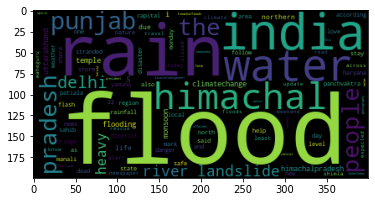

In [62]:
from collections import Counter
from PIL import Image
from wordcloud import WordCloud


temp_dict = Counter(sentiment_caption_graph)
wc = WordCloud(background_color="black", max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(temp_dict)
plt.imshow(wc)